In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import random
random.seed(0)
np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')
df.head()

,text,class
0,47 FDP_IFF и FDP_SDI. Имена ПФБ управления и...,1
1,29 4.5 Требования безопасности ИТ (APE_REQ) ...,1
2,"произведений и произведений, полученных способ...",1
3,"160 д) по поддержке ""свидетельства доверия"" ...",1
4,"122 FRU_RSA.1 ""Максимальные квоты"" содержит ...",1


In [ ]:
df['class'] = df['class'].replace({1: 0, 0: 1})

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


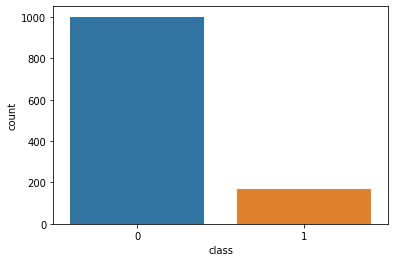

In [ ]:
sns.countplot(df['class'])

In [ ]:
df_len = df['text'].apply(lambda x: len(x.split()))

In [ ]:
X = df['text']
y = df['class']

In [ ]:
import re
import string

def preprocessing_text(txt):
    txt = txt.lower()
    txt = re.sub(r'\n',' ', txt)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt)
    txt = re.sub(r'\s+', ' ', txt, flags=re.I)
    txt = re.sub(r'\W', ' ', txt)
    return txt

In [ ]:
X = X.apply(lambda x: preprocessing_text(x))

In [ ]:
X = X.apply(lambda x: ' '.join(x.split()[:100]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Create model

In [ ]:
import re
TOKEN_RE=re.compile(r'[\w\d]+')
def tokenize_text_simple_regex(txt, min_size=4):
  txt=txt.lower()
  all_toks=TOKEN_RE.findall(txt)
  return [tok for tok in all_toks if len(tok)>=min_size]

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [ ]:
sklearn_pipeline = Pipeline((('vect', HashingVectorizer()),
                             ('cls', SGDClassifier(penalty='l2'))))
sklearn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', HashingVectorizer()), ('cls', SGDClassifier())])

Estimate model

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score

In [ ]:
y_pred = sklearn_pipeline.predict(X_test)

Text(91.68, 0.5, 'true_value')

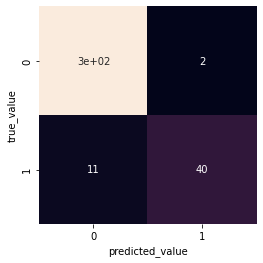

In [ ]:
baseline_conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_conf_mat, square= True, annot=True, cbar=False)
plt.xlabel('predicted_value')
plt.ylabel('true_value')

In [ ]:
print('f1 score: ', f1_score(y_test, y_pred))
print('recall score: ', recall_score(y_test, y_pred))
print('precision score: ', precision_score(y_test, y_pred))

f1 score:  0.8602150537634408
recall score:  0.7843137254901961
precision score:  0.9523809523809523
